
**Library**

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np

In [17]:
(X_train,y_train) , (X_test,y_test)=datasets.cifar10.load_data()

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
y_test = y_test.reshape(-1,)

In [21]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
def plot_exemple(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


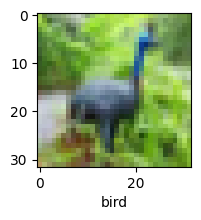

In [23]:
plot_exemple(X_train,y_train,6)

In [24]:
X_train = X_train/255.0
X_test = X_test/255.0


In [25]:
ann = models.Sequential()
ann.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
ann.add(layers.MaxPooling2D(2,2))
ann.add(layers.Conv2D(64,(3,3),activation='relu'))
ann.add(layers.MaxPooling2D(2,2))
ann.add(layers.Conv2D(128,(3,3),activation='relu'))
ann.add(layers.MaxPooling2D(2,2))
ann.add(layers.Flatten())
ann.add(layers.Dense(256,activation='relu'))
ann.add(layers.Dense(10,activation='softmax'))
ann.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [26]:
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
ann.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6915 - accuracy: 0.7575
Epoch 2/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6341 - accuracy: 0.7754
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5833 - accuracy: 0.7944
Epoch 4/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.5347 - accuracy: 0.8109
Epoch 5/20
1563/1563 [==============================] - 24s 16ms/step - loss: 0.4878 - accuracy: 0.8269
Epoch 6/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4501 - accuracy: 0.8398
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4096 - accuracy: 0.8544
Epoch 8/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.3795 - accuracy: 0.8640
Epoch 9/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3422 - accuracy: 0.8770
Epoch 10/20
1563/1563 [==============================] - 24s 15m

In [34]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred[:5]
y_pred_classes[:5]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.87      0.76      0.81      1000
           2       0.55      0.71      0.62      1000
           3       0.58      0.43      0.49      1000
           4       0.73      0.61      0.66      1000
           5       0.60      0.64      0.62      1000
           6       0.74      0.82      0.78      1000
           7       0.79      0.74      0.76      1000
           8       0.86      0.76      0.81      1000
           9       0.71      0.84      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



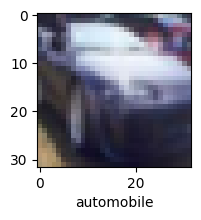

In [35]:
plot_exemple(X_test, y_test,1444)

In [36]:
classes[y_pred_classes[1444]]


'automobile'

Test With Own image


In [37]:
import cv2
from keras.preprocessing import image

In [41]:
# Load the image
img = cv2.imread('plane.jpg')

# resize to 32x32
img = cv2.resize(img, (32, 32))

# Convert the image to an array
img = image.img_to_array(img)

# Expand dimensions to be (1, 32, 32, 3)
img = np.expand_dims(img, axis=0)

# Normalize the image (as was done with training/test sets)
img = img/255.0

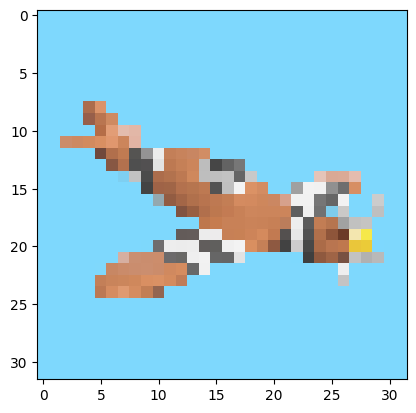

In [46]:
# Display the image
plt.imshow(cv2.cvtColor(img.squeeze(), cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
# Generate prediction
pred = ann.predict(img)

# Get the class with the maximum probability
class_index = np.argmax(pred)

# Get the corresponding class name
class_name = classes[class_index]

print("The model predicts that the image is a", class_name)

1/1 [==============================] - 0s 132ms/step
The model predicts that the image is a airplane
